## The Sparks Foundation GRIP March 2022
## Internship - Data Science and Business Analytics

Author: Dion Philip

## Task 2 - Prediction using Unsupervised ML

### Problem Statement: From the given iris dataset, predict the optimum number of clusters and represent it visually

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns 
sns.set(style='darkgrid')
import warnings
warnings.filterwarnings("ignore")

### Reading the dataset

In [2]:
iris = pd.read_csv('iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Exploratory Data Analysis

In [3]:
iris.drop('Id',axis=1,inplace=True)

In [4]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris.shape

(150, 5)

In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
iris.keys()

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

### Checking for null values

In [9]:
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
iris.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [11]:
iris.groupby('Species').agg(['mean']).reset_index()

,Species,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
,,mean,mean,mean,mean
0,Iris-setosa,5.006,3.418,1.464,0.244
1,Iris-versicolor,5.936,2.770,4.260,1.326
2,Iris-virginica,6.588,2.974,5.552,2.026


## Data Visualization

<AxesSubplot:>

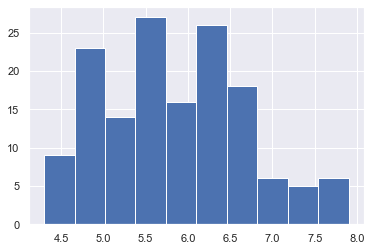

In [12]:
iris['SepalLengthCm'].hist()

<AxesSubplot:>

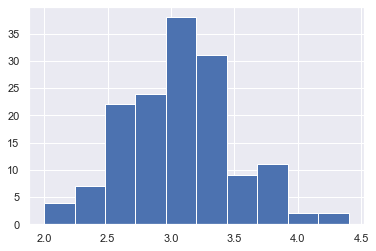

In [13]:
iris['SepalWidthCm'].hist()

<AxesSubplot:>

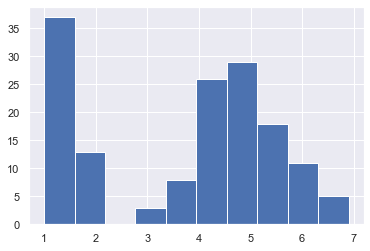

In [14]:
iris['PetalLengthCm'].hist()

<AxesSubplot:>

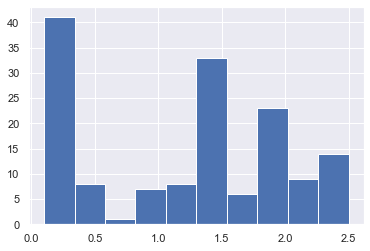

In [15]:
iris['PetalWidthCm'].hist()

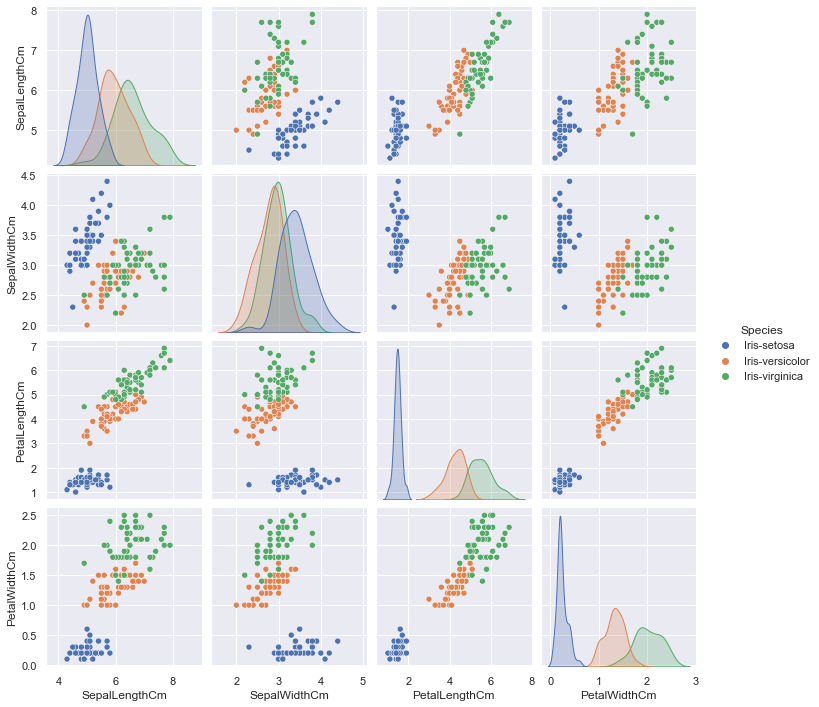

In [16]:
sns.pairplot(iris, hue='Species')

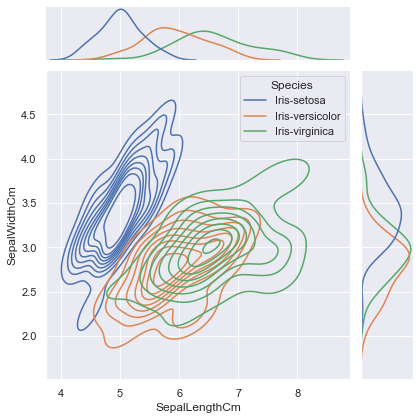

In [17]:
# Joint Plot
sns.jointplot(x=iris['SepalLengthCm'], y=iris['SepalWidthCm'], hue='Species', data=iris, kind='kde', color='g')

<AxesSubplot:xlabel='Species', ylabel='SepalLengthCm'>

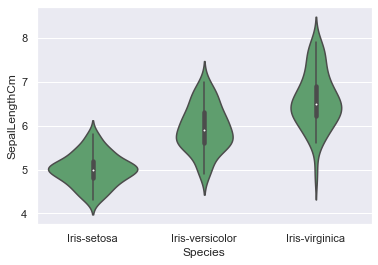

In [18]:
# Violin Plot
sns.violinplot(x='Species', y=iris['SepalLengthCm'], data=iris, color='g')

<AxesSubplot:xlabel='Species', ylabel='count'>

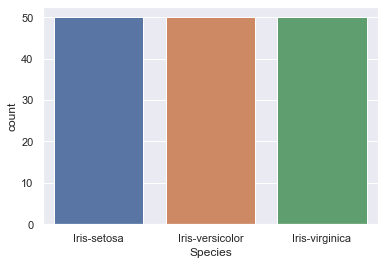

In [19]:
# Countplot
sns.countplot('Species', data=iris)

### Merging the boxplot and strippplot

<AxesSubplot:xlabel='Species', ylabel='SepalLengthCm'>

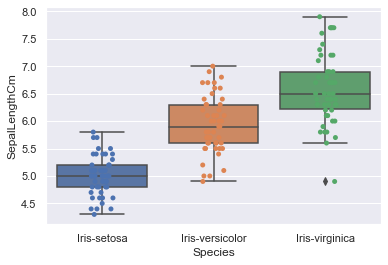

In [20]:
sns.boxplot(x='Species', y='SepalLengthCm', data=iris)
sns.stripplot(x='Species', y='SepalLengthCm', data=iris, jitter=True)

### Correlation heatmap

<AxesSubplot:>

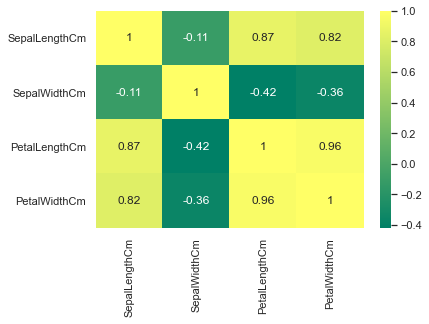

In [21]:
# Checking the correlation between variables
sns.heatmap(iris.corr(), annot=True, cmap='summer')

### Finding the optimal number of clusters using Elbow Method

In [22]:
array = iris.iloc[:,:-1].values
array

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

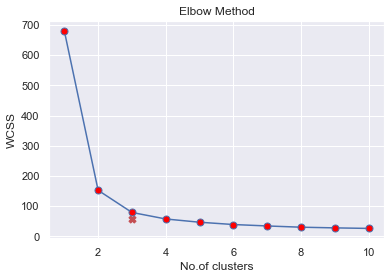

In [23]:
#Inertia can help you get the values for within cluster distances
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(array)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss, marker='o', markerfacecolor='red', markersize=7)
plt.scatter(3, wcss[3], marker='X',s=50, c='r')
plt.title("Elbow Method")
plt.xlabel('No.of clusters')
plt.ylabel('WCSS')
plt.show()

The optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From the above graph we can choose the number of clusters as '3'.

### Creating the KMeans classifier algorithm

In [24]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_means = kmeans.fit_predict(array)

In [25]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [26]:
wcss

[680.8243999999996,
 152.36870647733915,
 78.94084142614601,
 57.317873214285726,
 46.56163015873017,
 38.930963049671746,
 34.190687924796634,
 30.063874432733137,
 27.84235606060608,
 26.04820224804435]

In [27]:
kmeans.inertia_

78.94084142614601

In [28]:
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

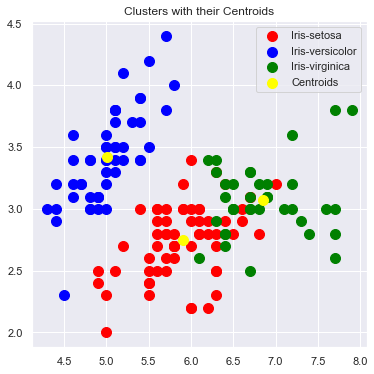

In [29]:
# Visualising the clusters - On the first two columns
plt.figure(figsize=(6,6))
plt.scatter(array[y_means == 0, 0], array[y_means == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')

plt.scatter(array[y_means == 1, 0], array[y_means == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolor')

plt.scatter(array[y_means == 2, 0], array[y_means == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')


# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.title('Clusters with their Centroids')

plt.legend()

In [30]:
y_means

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [31]:
iris['Clusters'] = kmeans.labels_

In [32]:
iris.Clusters.value_counts()

0    62
1    50
2    38
Name: Clusters, dtype: int64

<AxesSubplot:xlabel='Clusters', ylabel='count'>

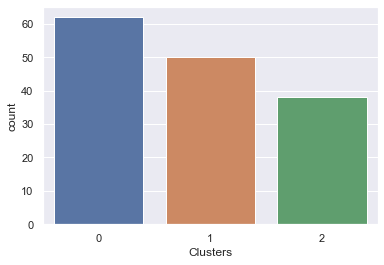

In [33]:
sns.countplot('Clusters',data=iris)

In [34]:
iris.groupby('Clusters').agg(['mean']).reset_index()

,Clusters,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
,,mean,mean,mean,mean
0,0,5.901613,2.748387,4.393548,1.433871
1,1,5.006000,3.418000,1.464000,0.244000
2,2,6.850000,3.073684,5.742105,2.071053
